In [1]:
import pandas as pd
import numpy as np

In [35]:
e_filename = '/Users/benjamin/Desktop/DSI/capstone/the-simpsons-by-the-data/simpsons_episodes.csv'

df = pd.read_csv(e_filename)
#initial dataframe cleaning

# drop columns that provide nothing useful for quantitative analysis
df.drop('image_url', axis=1, inplace = True)
df.drop('video_url', axis=1, inplace = True)
df.drop('imdb_votes', axis=1, inplace=True)
df.drop('production_code', axis=1, inplace=True)

# reduce views to a proportion, equal to number of total views over number of viewers in the USA (this number is in millions, so it will always allow a positive value here)
df['views'] = df['us_viewers_in_millions']
df.drop('us_viewers_in_millions', axis=1, inplace=True)

# turn the title into a metric for lenght of episode title
df['title'] = df['title'].apply(lambda x: len(x))

# currently dropping start date, but this could change if insightful - maybe for political cycles?
df['original_air_date'] = pd.to_datetime(df['original_air_date'])
## df.drop('original_air_date', axis=1, inplace=True)

# ideally NaN Imputing could be done using a more accurate measure such as KNN
df.fillna(method = 'bfill', inplace=True)

print(df.head())

   id  title original_air_date  season  number_in_season  number_in_series  \
0  10     17        1990-03-25       1                10                10   
1  12     18        1990-04-29       1                12                12   
2  14     16        1990-10-11       2                 1                14   
3  17     53        1990-11-01       2                 4                17   
4  19     20        1990-11-15       2                 6                19   

   views  imdb_rating  
0   30.3          7.4  
1   30.4          8.3  
2   33.6          8.2  
3   26.1          8.1  
4   25.4          8.0  


In [36]:
# getting info for the dataframe
df.describe()

,id,title,season,number_in_season,number_in_series,views,imdb_rating
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,20.975000,14.100000,11.585000,300.500000,11.817867,7.382167
std,173.349358,8.659061,7.755444,6.549881,173.349358,6.426929,0.732707
min,1.000000,4.000000,1.000000,1.000000,1.000000,2.320000,4.500000
25%,150.750000,15.000000,7.000000,6.000000,150.750000,7.022500,6.900000
50%,300.500000,20.000000,14.000000,11.000000,300.500000,10.300000,7.250000
75%,450.250000,25.000000,21.000000,17.000000,450.250000,15.300000,8.000000
max,600.000000,83.000000,28.000000,25.000000,600.000000,33.600000,9.200000


In [37]:
# get minimum and maximum (start date end date) for the corpus of episodes. 
print(df['original_air_date'].min())
print(df['original_air_date'].max())

1989-12-17 00:00:00
2016-10-16 00:00:00


In [38]:
# get minimum and maximum for the IMDB rating of corpus. 
print(df['imdb_rating'].min())
print(df['imdb_rating'].max())

4.5
9.2


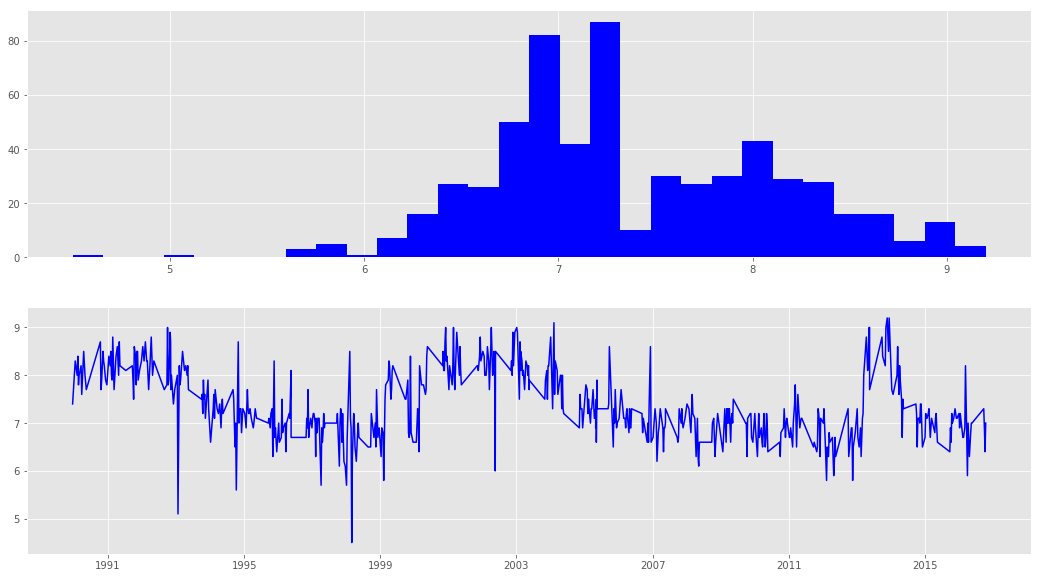

In [39]:
import matplotlib.pyplot as plt
# ensure plots load inline
%matplotlib inline
#give better plot style
plt.style.use('ggplot')

#visualize the distribution of the IMDB ratings, both by themselves and over time.

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax.hist(df['imdb_rating'].as_matrix(), bins=30, color='b')
ax2.plot(sorted(df['original_air_date']), df['imdb_rating'].as_matrix(), color='b')
plt.show()

In [40]:
plt.close('all')

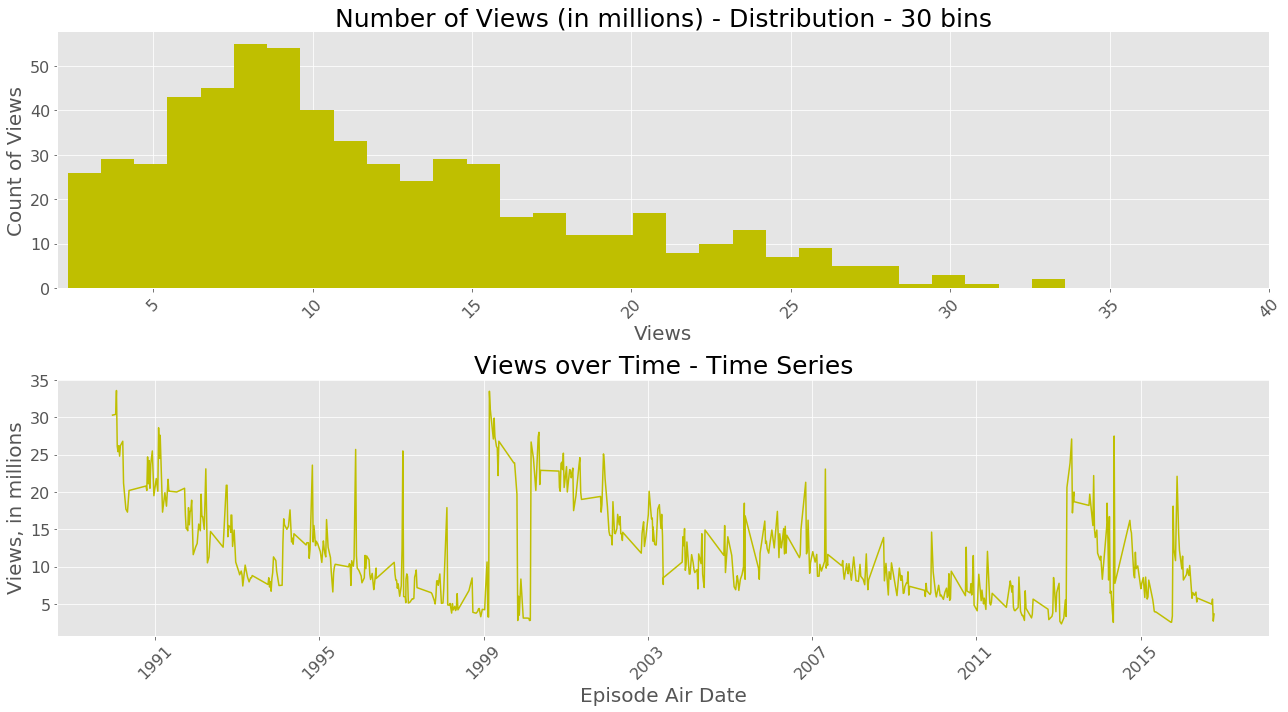

In [50]:
# visualize viewership over the years

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax.hist(df['views'].as_matrix(), bins=30, color='y')
ax2.plot(sorted(df['original_air_date']), df['views'].as_matrix(), color='y')
ax.set_xlim((2, 40))
# ax.set_xticks(list(np.linspace(0,1200, num=10, endpoint=False)))
ax.set_title('Number of Views (in millions) - Distribution - 30 bins', size=25)
ax.set_xlabel('Views', size=20)
ax.set_ylabel('Count of Views', size=20)
ax.tick_params(labelsize=16)
ax2.set_title('Views over Time - Time Series', size=25)
ax2.tick_params(labelsize=16)
ax2.set_xlabel('Episode Air Date', size=20)
ax2.set_ylabel('Views, in millions', size=20)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There are several episodes with large spikes in viewership, some with large jumps at increments.

In [57]:
# in millions of views, what are the metrics view count?
print('Simpsons Views Standard Deviation :', round(df['views'].std(), 1))
print('Simpsons Views Mean :', round(df['views'].mean(), 1))
print('Simpsons Views Median :', round(df['views'].median(), 1))
print('Simpsons Views Highest Recorded :', round(df['views'].max(), 1))


Simpsons Views Standard Deviation : 6.4
Simpsons Views Mean : 11.8
Simpsons Views Median : 10.3
Simpsons Views Highest Recorded : 33.6


In [60]:
# what are the metrics for IMDB ratings, on ten point scale?
print('Simpsons Rating Standard Deviation :', round(df['imdb_rating'].std(), 1))
print('Simpsons Rating Mean :', round(df['imdb_rating'].mean(), 1))
print('Simpsons Rating Median :', round(df['imdb_rating'].median(), 1))
print('Simpsons Rating Highest Recorded :', round(df['imdb_rating'].max(), 1))

Simpsons Rating Standard Deviation : 0.7
Simpsons Rating Mean : 7.4
Simpsons Rating Median : 7.2
Simpsons Rating Highest Recorded : 9.2
